In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr 
from scipy.stats import ttest_ind 

### Importing & merging
I'm starting off by importing both of the data files. The steps data was separated with ;'s instead of commas.
To read it in, i'm using 'sep=';' which notifies the programme that the separator are ;s.
This allows pandas to make it into a dataframe.

In [2]:
df1 = pd.read_csv('assignment1-survey.csv')
df2 = pd.read_csv('assignment1-steps.csv', sep=';')

In the next step I'm merging the dataframes on ID.

In [3]:
df = pd.merge(df1, df2, on='id')
df.head(5)

,id,city,gender,age,hh_size,hh_type,education,height,weight,waist,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Montpellier,male,25-34,2,couple,master or doctorate,183.0,62.0,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Montpellier,female,25-34,2,couple,high school,163.0,60.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lyon,female,25-34,2,couple,master or doctorate,172.0,65.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Lyon,male,25-34,3,single parent,bachelor,182.0,85.0,95.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Bordeaux,male,25-34,2,couple,master or doctorate,177.0,70.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Time-based lineplot
I'm interested how many steps have been measured during a certain week. 
I've randomly picked the week of 11-11-2013.
To plot this, I'm slicing the dataframe first and saving it in 'a'.
Then,  I want the mean of the steps each day and I use dropna to drop the NaN's. Otherwise Seaborn won't be able to plot.
The next step is to make it into a dataframe, since .mean() returns a series.

Last but not least, I'm plotting it in a lineplot with the Date on the X-axis and the steps on the Y-axis.

In [4]:
a = df.loc[:,'11-11-2013':'24-11-2013']
a = a.mean().dropna()
a = pd.DataFrame({'Date':a.index, 'Steps':a.values})

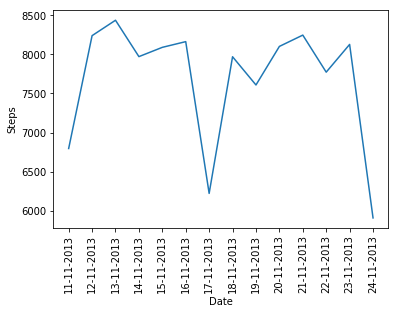

In [5]:
plotje = sns.lineplot(x='Date', y='Steps', data=a)
plt.xticks(rotation = 90)
plotje

### One quantitative variable
I've chosen to map the mean steps of bachelor holders.
To do this, I'm creating a new DataFrame called 'b' which takes the education column from df and combines it with df2.
Then, I'm sorting the dataframe by education and filtering out all bachelors.
After this I'm calculating the mean of the steps.

In [6]:
edu = pd.DataFrame({'education':df['education']})
b = pd.concat([edu,df2], axis=1)
b = b.set_index('id').sort_values(by='education')
h = b.loc[b['education'] == 'bachelor']
h = b.loc[:,'20-6-2013':'13-5-2014'].mean()
h.head(3)

20-6-2013     2253.454545
21-6-2013     8968.935065
22-6-2013    10412.117424
dtype: float64

#### .describe()
To see more information about the steps in h, i'm using .describe().
We can see that the mean steps of all bachelor holders is 7884.95;
The median is 7982.58

In [7]:
h.describe()

count      327.000000
mean      8114.208858
std        928.040500
min       2253.454545
25%       7689.180802
50%       8211.579832
75%       8626.358630
max      10668.343137
dtype: float64

#### .var()
Pandas has a built-in variance calculator. I'm using it on h to see how big the variance is.
As we can see the number is huge. This could be true due to the big differences between the values (for instance, the lowest number is 1433 and the highest is 10661.. that's a huge difference)

In [8]:
h.var()

861259.1687501062

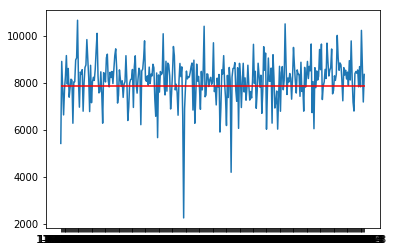

In [9]:
sns.lineplot(data=h, zorder=1)
plt.hlines(7884, 0, 327, color='red', zorder=2)
plt.show()

To plot the mean steps I chose a lineplot. I've added a red line to show where the mean is.

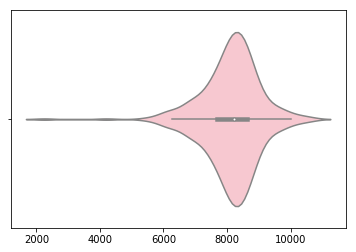

In [10]:
sns.violinplot(h, color='pink')

Another plot is the violin plot. Looking at this plot we can say something about the skewedness. It is left skewed.
This is very logical, since it's more common to have no data / less steps instead of measuring more and more steps.
You can see that it's very normally distributed, since the violin plot has a nice bell shape to it. 
Outliers in this dataset are on the left, but again, these are expected since it's easy to not walk as many steps.

### Two qualitative variables
I'm sticking with education for this one, but also adding household size.
To measure this I'm creating another dataframe with these variables.

First, I'm creating a dataframe of hhsize and adding it to b.
Then I'm removing the top row, which didn't have any values. I'm not sure how that happened but that might have something to do with all the experimenting I did with this df.
After this, I've calculated the mean of axis=1, slicing away the data that's not relevant.

However, I changed my mind during this exercise and I started to change education to weight, since this is also a number
I could've made dummies but this is something for the next part of the exercise.

Finally I'm creating the DataFrame 'clast' which has all the values I need in it: weight, household size and the mean steps of each person.

In [11]:
hhsize = pd.DataFrame({'hh_size':df['hh_size']})
c = pd.concat([hhsize, b], axis=1)
c = c.loc[1:]
mean = c.iloc[:,3:330].mean(axis=1)

weight = df1['weight']


clast = pd.concat([weight, hhsize], axis=1)
clast['mean'] = mean
clast = clast.dropna()
clast.head(4)

,weight,hh_size,mean
1,60.0,2,6757.911765
2,65.0,2,3403.964706
3,85.0,3,4986.550505
4,70.0,2,6264.478261


For the best results I had to use .dropna() on clast. This is also to make sure that Pearson's R works later on.

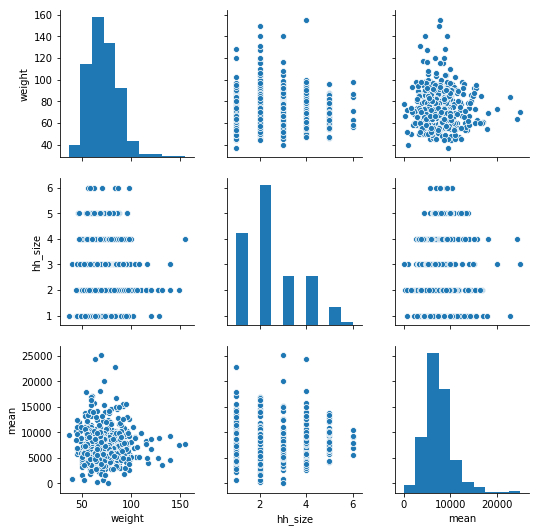

In [12]:
sns.pairplot(clast)

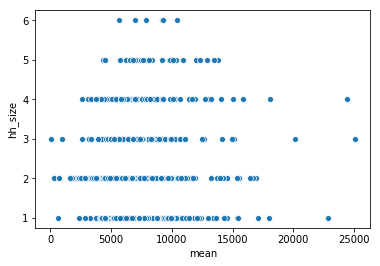

In [13]:
sns.scatterplot(x='mean', y='hh_size', data=clast)

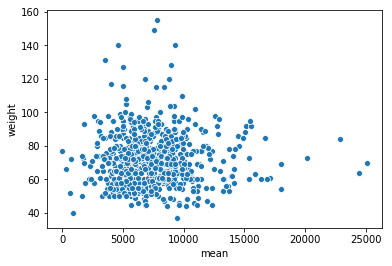

In [14]:
sns.scatterplot(x='mean', y='weight', data=clast)

##### Pearson's R

In [15]:
pearsonr(clast['weight'], clast['mean'])

(-0.029072795507076914, 0.43892275319864515)

In [16]:
pearsonr(clast['hh_size'], clast['mean'])

(0.02303094037960811, 0.5398028035661278)

Both of these variables are not very correlated 
(with r = -0.02 & 0.02). They should be above 0.6 to be considered highly correlated.
Next to that, the p-values are very high.
It shows that weight is a bit more correlated to the mean steps.

#### Qualitative variable with two levels.
In this part I'm going to use the **gender** variable and the **height** variable, comparing these with the mean steps.

In [17]:
#Creating the new DataFrame:
mean = pd.DataFrame({'mean_steps':clast['mean']})
gender = pd.DataFrame({'gender':df['gender']})
height = pd.DataFrame({'height':df['height']})

d = pd.concat([height, gender, mean], axis=1)
d.head(4)

,height,gender,mean_steps
0,183.0,male,NaN
1,163.0,female,6757.911765
2,172.0,female,3403.964706
3,182.0,male,4986.550505


In [18]:
#create dummies
dummies = pd.get_dummies(d['gender'])
d = pd.concat([d, dummies], axis=1)
d.head(4)

,height,gender,mean_steps,female,male
0,183.0,male,NaN,0,1
1,163.0,female,6757.911765,1,0
2,172.0,female,3403.964706,1,0
3,182.0,male,4986.550505,0,1


In [19]:
d = d.dropna()

In [20]:
d.head(4)

,height,gender,mean_steps,female,male
1,163.0,female,6757.911765,1,0
2,172.0,female,3403.964706,1,0
3,182.0,male,4986.550505,0,1
4,177.0,male,6264.478261,0,1


(array([0, 1]), <a list of 2 Text xticklabel objects>)

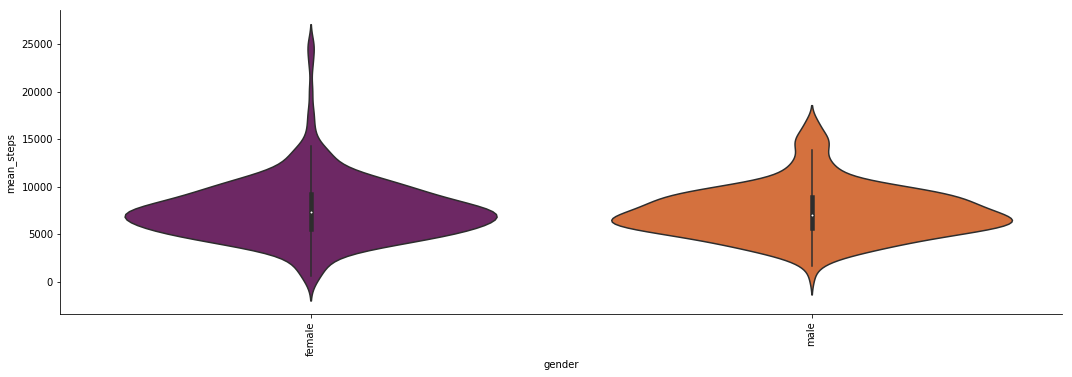

In [26]:
sns.catplot(y='mean_steps', x='gender', kind='violin', palette='inferno', data=d, aspect=3)
plt.xticks(rotation = 90)

In [22]:
#T-Test
ttest_ind(d['mean_steps'], d['female'], nan_policy='omit')

Ttest_indResult(statistic=66.69770761759922, pvalue=0.0)

#### Two Qualitative Variables
I'm looking at gender 

(array([0, 1]), <a list of 2 Text xticklabel objects>)

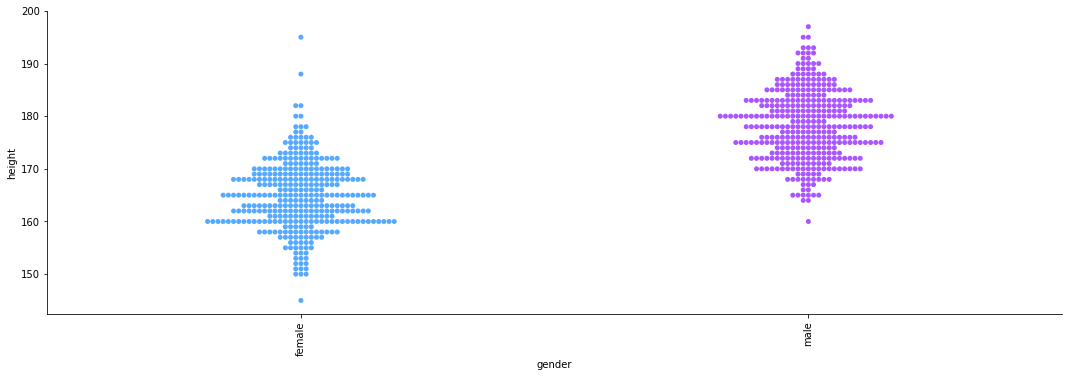

In [23]:
sns.catplot(y='height', x='gender', kind='swarm', palette='cool', data=d, aspect=3)
plt.xticks(rotation = 90)